<h1 align="center">Convex Optimization - 25756</h1>
<h4 align="center">Dr. yasaee</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Project</h4>
<h4 align="center">Amir Hossein Yari & Mahdi Abbaszadeh</h4>
<h5 align="center">99102507 & 99106403</h5>



## <font color='yellow'>Question 1 & 2</font>

In [1]:
######## simulation - question 1 & 2  ########
# Import required library
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cvxpy as cp
import time

# Initialize parameter
eta = [0.01, 0.1, 1, 10]
n = 10
m = 100
cov = np.identity(n)
mean = [0] * 10
Z = np.zeros((m, n))
B = np.zeros((m, 1))
T = 4000
x_0 = np.zeros(((n, 1)))
f_x_t = np.zeros((T, 1))
f_x_min_t = np.zeros((T, 1))
convergence_var = np.zeros((len(eta),T))
convergence_var_2 = np.zeros((T, 1))
for i in np.arange(m):
    Z[i, :] = np.random.multivariate_normal(mean, cov)
    B[i] = np.random.normal(0, 1)

# Finding the optimum value using cvxpy
x = cp.Variable((n, 1))
objective_func = cp.Minimize(cp.norm((Z@x - B), 1))
constraints = []
prob = cp.Problem(objective_func, constraints)
prob.solve()

x_opt = x.value
f_opt = prob.value/m

# Print Output
print("x_optimum = ", x.value)
print("f(x*) = ", f_opt)

x_optimum =  [[-0.12157244]
 [-0.16791874]
 [ 0.21166863]
 [-0.01694262]
 [-0.05069812]
 [-0.00698261]
 [-0.02427569]
 [-0.19421025]
 [ 0.23348097]
 [ 0.16162341]]
f(x*) =  0.8058250146040997


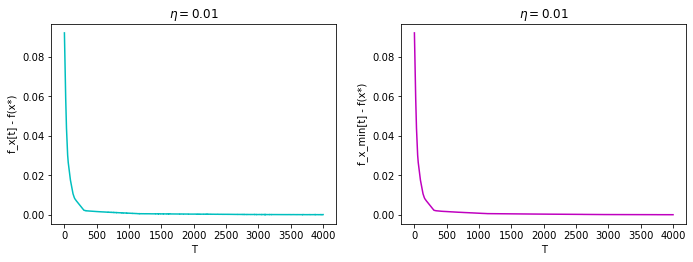

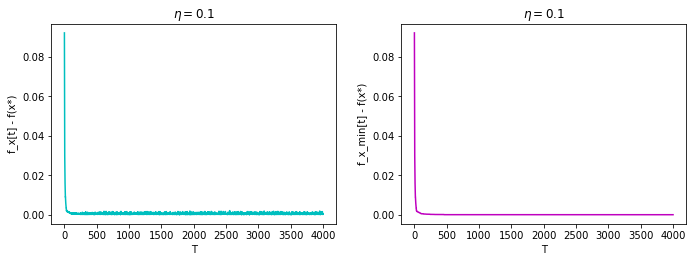

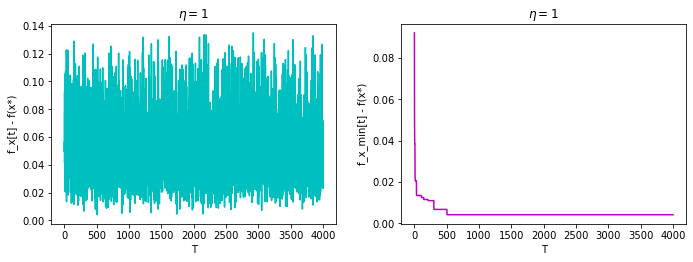

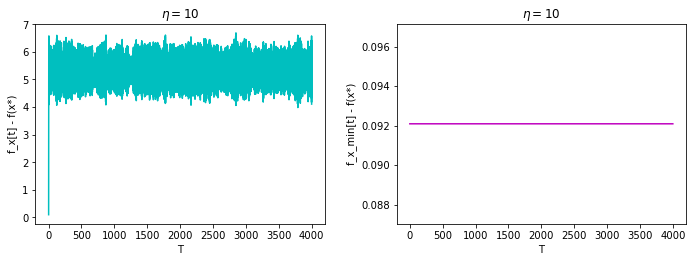

In [2]:
# implementing the algorithm
subgrad = np.zeros((n, 1))
elapsed_time_GD = np.zeros((len(eta), T))
for e in eta:
    x_t = x_0
    for t in np.arange(T):
        begin = time.time()
        f_x_t[t] = np.sum(np.abs(Z@x_t - B))/m
        if (t == 0):
            f_x_min_t[t] = f_x_t[t]
        elif (f_x_t[t] < f_x_min_t[t - 1]):
            f_x_min_t[t] = f_x_t[t]
        else:
            f_x_min_t[t] = f_x_min_t[t - 1]
        convergence_var[eta.index(e), t] = f_x_t[t] - f_opt
        end = time.time()
        elapsed_time_GD[eta.index(e), t] = end - begin
        convergence_var_2[t] = f_x_min_t[t] - f_opt
        for i in np.arange(m):
            tmp = np.dot(Z[i, :], x_t) - B[i]
            if (tmp > 0):
                subgrad += np.reshape(Z[i , :], (n,1))
            elif (tmp == 0):
                a = np.random.rand()
                subgrad += np.reshape(a * Z[i, :] + (1 - a) * (-Z[i, :]), (n, 1))
            else:
                subgrad -= np.reshape(Z[i , :], (n,1))
        subgrad /= m
        x_t = x_t - e*subgrad

    # Plotting
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(np.arange(1, T+1), convergence_var[eta.index(e),:], "c")
    plt.xlabel("T")
    plt.ylabel("f_x[t] - f(x*)")
    plt.title((r'$\eta = $' + str(e)))
    plt.subplot(1,2,2)
    plt.plot(np.arange(1, T+1), convergence_var_2, "m")
    plt.xlabel("T")
    plt.ylabel("f_x_min[t] - f(x*)")
    plt.title((r'$\eta = $' + str(e)))
    plt.tight_layout(pad = 2)

## <font color='yellow'>Question 3</font>

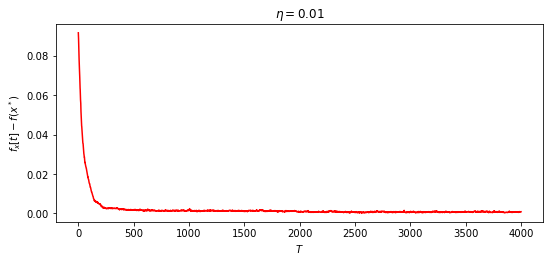

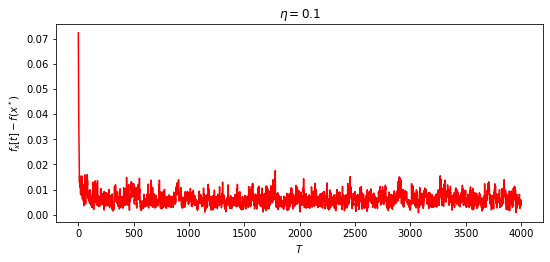

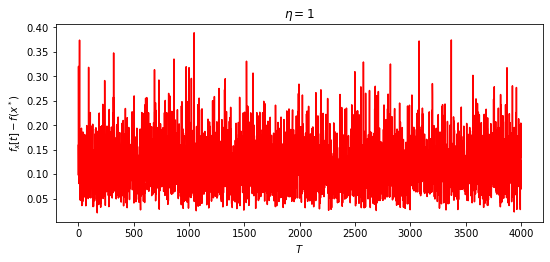

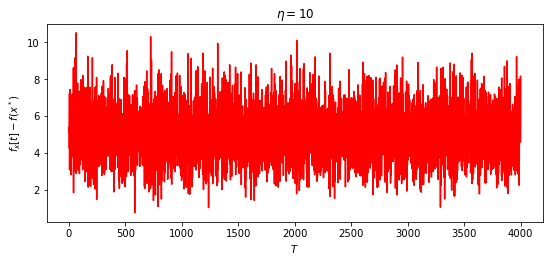

In [3]:
def random_subgrad(expected):
  random_subgrad = np.zeros(len(expected))
  for i in range(len(expected)):
    random_subgrad[i] = np.random.normal(loc=expected[i], scale=0.13)
  return random_subgrad

def subgradient(x, Z, B):
  m = len(B)
  subgrad = np.zeros(Z.shape[1])
  for i in range(m):
    if (Z[i, :] @ x - B[i]) >= 0:
      subgrad = subgrad + Z[i, :]
    else:
      subgrad = subgrad - Z[i, :]
  subgrad = subgrad/m
  return subgrad

# implementing the algorithm
eta = [0.01, 0.1, 1, 10]
convergence_var_3 = np.zeros((len(eta),T))
elapsed_time_SGD = np.zeros((len(eta), T))
m = len(B)
for e in eta:
  x_t = x_0
  for t in np.arange(T):
    begin = time.time()
    expected = subgradient(x_t, Z, B)
    v = random_subgrad(expected)
    x_t = x_t.T - e * v
    x_t = x_t.T
    convergence_var_3[eta.index(e), t] = (np.linalg.norm(Z @ x_t - B, ord=1) - np.linalg.norm(Z @ x_opt - B, ord=1))/m
    end = time.time()
    elapsed_time_SGD[eta.index(e), t] = end - begin
  # Plotting
  plt.figure(figsize=(8,4))
  plt.plot(np.arange(1, T+1), convergence_var_3[eta.index(e),:], "r")
  plt.xlabel(r'$T$')
  plt.ylabel(r'$f_x[t] - f(x^*)$')
  plt.title((r'$\eta = $' + str(e)))
  plt.tight_layout(pad = 2)

## <font color='yellow'>Question 4</font>

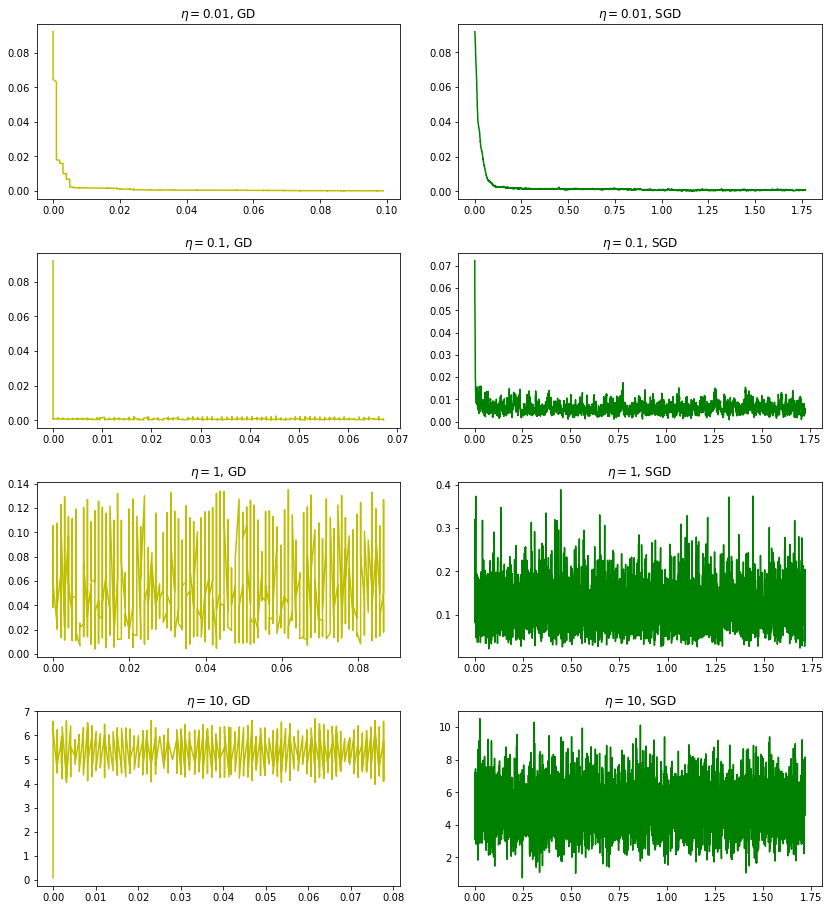

In [4]:
# cumulative sum of the elapsed time
time_GD = np.cumsum(elapsed_time_GD, axis=1)
time_SGD = np.cumsum(elapsed_time_SGD, axis=1)

# Plotting
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 13))
axs[0, 0].plot(time_GD[0, :], convergence_var[0, :], "y")
axs[0, 0].set_title(r'$\eta = 0.01$, GD')
axs[1, 0].plot(time_GD[1, :], convergence_var[1, :], "y")
axs[1, 0].set_title(r'$\eta = 0.1$, GD')
axs[2, 0].plot(time_GD[2, :], convergence_var[2, :], "y")
axs[2, 0].set_title(r'$\eta = 1$, GD')
axs[3, 0].plot(time_GD[3, :], convergence_var[3, :], "y")
axs[3, 0].set_title(r'$\eta = 10$, GD')
axs[0, 1].plot(time_SGD[0, :], convergence_var_3[0, :], "g")
axs[0, 1].set_title(r'$\eta = 0.01$, SGD')
axs[1, 1].plot(time_SGD[1, :], convergence_var_3[1, :], "g")
axs[1, 1].set_title(r'$\eta = 0.1$, SGD')
axs[2, 1].plot(time_SGD[2, :], convergence_var_3[2, :], "g")
axs[2, 1].set_title(r'$\eta = 1$, SGD')
axs[3, 1].plot(time_SGD[3, :], convergence_var_3[3, :], "g")
axs[3, 1].set_title(r'$\eta = 10$, SGD')
plt.tight_layout(pad = 2)

## <font color='yellow'>Question 5-9 </font>

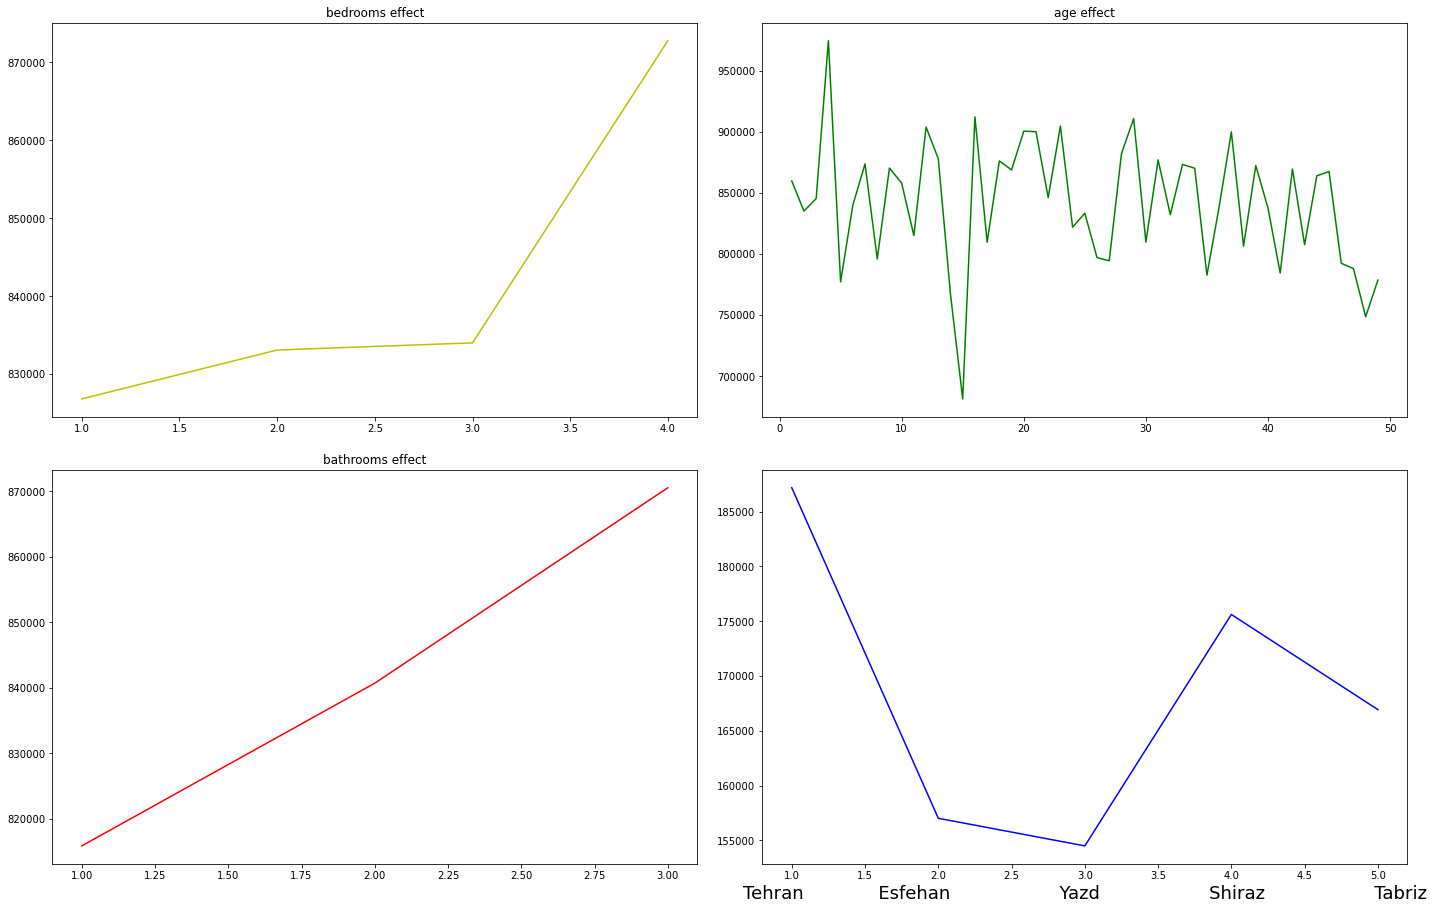

In [61]:
######## simulation - question 5 - 9 ########
# Import required library
import pandas as pd

# importing house_data
data = pd.read_csv('house_data.csv')

##### plotting the figures

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 13))

tmp = data.groupby('bedrooms').mean().sort_index(ascending=True)
axs[0, 0].plot(tmp['price'], "y")
axs[0, 0].set_title(r'bedrooms effect')

tmp = data.groupby('bathrooms').mean().sort_index(ascending=True)
axs[1, 0].plot(tmp['price'], "r")
axs[1, 0].set_title(r'bathrooms effect')

tmp = data.groupby('age').mean().sort_index(ascending=True)

axs[0, 1].plot(tmp['price'], "g")
axs[0, 1].set_title(r'age effect')

means_of_price = np.zeros(5)
Cities = ["Tehran", "Esfehan", "Yazd", "Shiraz", "Tabriz"]
for city in Cities:
    t = (data.loc[:, city] == 1)
    means_of_price[Cities.index(city)] = sum(data[t].price)/len(t)
    
axs[1, 1].plot(np.arange(1, 6), means_of_price, "b")
axs[1, 1].set_xlabel(r'Tehran             Esfehan                   Yazd                   Shiraz                   Tabriz', fontsize=18)

plt.tight_layout(pad = 2)

In [37]:
## Test and Train splitting and normalizing data
Train_data = data.loc[0 : np.floor(data.shape[0] * 0.75) - 1, :]
Test_data = data.loc[np.floor(data.shape[0] * 0.75) : , :]
Train_data = (Train_data - Train_data.mean())/Train_data.std()
Test_data = (Test_data - Test_data.mean())/Test_data.std()

In [62]:
## MSE function :
def MSE_calc(data_1, data_2):
    n = len(data_1)
    data_1 = np.reshape(data_1, (n, 1))
    data_2 = np.reshape(data_2, (n, 1))
    MSE = np.sum((data_1 - data_2)**2)/n
    return MSE

In [81]:
def subgradient(w, b, X, y):
    subgrad_w = np.zeros((len(w), 1))
    subgrad_b = 0
    n = len(y)
    m = len(w)
    b_tmp = np.reshape(np.array([b]*n), (n, 1))
    y = np.reshape(y, (n, 1))
    w = np.reshape(w, (m, 1))
    X = np.reshape(X, (150, 9))
    tmp_var = X@w + b_tmp - y
    subgrad_w = (2/n)*X.T@(tmp_var)
    subgrad_b = (2/n)*np.sum(tmp_var)
    return subgrad_w, subgrad_b


### One stage of SGD algorithm
def SGD_One_Stage(w, b, batch_of_data, eta):
        p, q = batch_of_data.shape
        w = w.reshape(9, 1)
        subgrad_w, subgrad_b = subgradient(w, b, batch_of_data[:, 0: q - 1], batch_of_data[:, q - 1])
        w_new = w - eta * subgrad_w
        b_new = b - eta * subgrad_b
        return w_new, b_new

In [82]:
#### estimating (W, b) for multiple batches####
epoch = 100
batch = 150 # 20% of train set size
T = 4000
eta = 0.01
w = np.random.rand(9)
b = np.random.rand()
mse_train = np.zeros(100)
mse_test = np.zeros(100)
## run the algorithm
for j in np.arange(epoch):
    Train_data = Train_data.sample(frac = 1).reset_index(drop=True)
    for k in np.arange(5):
        batch_of_data = Train_data[k*batch : k*batch + 150].to_numpy()
        for i in np.arange(T):
            w, b = SGD_One_Stage(w, b, batch_of_data, eta)
    b_reshape_1 = np.reshape(np.array([b]*750), (750, 1))
    train_estimate =  np.reshape(Train_data.to_numpy()[:, 0:9], (750, len(w))) @ np.reshape(w, (9, 1)) + b_reshape_1
    b_reshape_2 = np.reshape(np.array([b]*250), (250, 1))
    test_estimate = np.reshape(Test_data.to_numpy()[:, 0:9], (250, len(w))) @ np.reshape(w, (9, 1)) + b_reshape_2
    mse_train[j] = MSE_calc(Train_data.to_numpy()[:, 9], train_estimate)
    mse_test[j] = MSE_calc(Test_data.to_numpy()[:, 9], test_estimate)

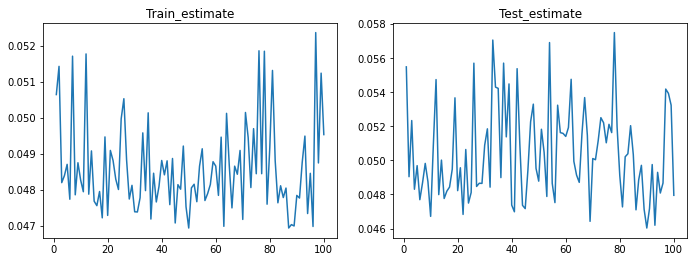

In [85]:
plt.figure(figsize=(10,4))
plt.subplot(1,2, 1)
plt.plot(np.arange(1, 101),mse_train )
plt.title(r'Train_estimate')
plt.subplot(1,2,2)
plt.plot(np.arange(1, 101),mse_test)
plt.title(r'Test_estimate')
plt.subplot(1,2,2)
plt.tight_layout(pad = 2)